*THUẬT TOÁN UNIFORM - COST SEARCH

In [1]:
from collections import defaultdict
from queue import PriorityQueue

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

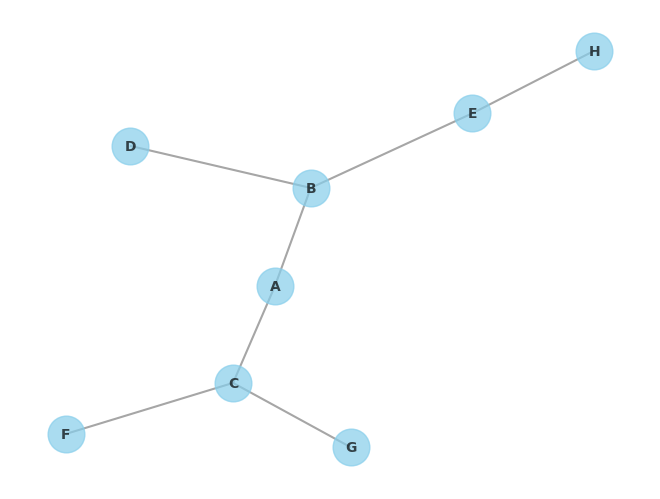

| Node  | Frontiers                 | Reached                   | Cost       |
| A     | -                         | A                         | 0          |
| B     | C                         | A, B                      | 1          |
| D     | C, E                      | A, D, B                   | 3          |
| C     | E                         | A, C, D, B                | 4          |
| E     | F, G                      | A, C, D, B, E             | 6          |
| F     | G, H                      | A, C, F, D, B, E          | 7          |
| G     | H                         | A, C, F, D, B, E, G       | 11         |
| H     | -                         | A, C, F, D, B, H, E, G    | 14         |


In [5]:
import heapq

def uniform_cost_search(graph, start_node):
    visited = set()  # Tập hợp để lưu các đỉnh đã được thăm
    priority_queue = [(0, start_node)]  # Hàng đợi ưu tiên để theo dõi các nút và chi phí tích lũy

    # In bảng tiêu đề
    print(f"| {'Node':<5} | {'Frontiers':<25} | {'Reached':<25} | {'Cost':<10} |")

    while priority_queue:
        cost, current_node = heapq.heappop(priority_queue)  # Lấy nút có chi phí thấp nhất từ hàng đợi

        if current_node not in visited:
            visited.add(current_node)  # Đánh dấu đỉnh hiện tại là đã thăm

            # In thông tin hiện tại ra màn hình
            frontiers = ', '.join(node for _, node in priority_queue) if priority_queue else '-'
            reached = ', '.join(visited)
            print(f"| {current_node:<5} | {frontiers:<25} | {reached:<25} | {cost:<10} |")

            # Thêm các đỉnh kề chưa được thăm vào hàng đợi ưu tiên
            for neighbor, edge_cost in graph[current_node].items():
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (cost + edge_cost, neighbor))
                    
example_graph_1 = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'D': 2, 'E': 5},
    'C': {'A': 4, 'F': 3, 'G': 7},
    'D': {'B': 2},
    'E': {'B': 5, 'H': 8},
    'F': {'C': 3},
    'G': {'C': 7},
    'H': {'E': 8}
}

example_graph = {  # graph này là cho bài toàn romania
    'A': {'B': 75, 'S': 140, 'T': 118},
    'B': {'A': 75, 'O': 71},
    'O': {'B': 71, 'S': 151},
    'S': {'A': 140, 'O': 151, 'F': 99, 'R': 80},
    'T': {'A': 118, 'L': 111},
    'L': {'T': 111, 'M': 70},
    'M': {'L': 70, 'D': 75},
    'D': {'M': 75, 'C' :120},
    'C': {'D': 120, 'R': 146, 'P': 138},
    'R': {'S': 80, 'C': 146, 'P': 97},
    'F': {'S': 99, 'Bu': 211},
    'P': {'R': 97, 'C': 138, 'Bu': 101},
    'Bu': {'F': 211, 'P': 101, 'U': 85, 'G': 90},
    'U': {'Bu': 85, 'V': 142, 'H': 98},
    'V': {'U': 142, 'I': 92},
    'I': {'V': 92, 'N': 87},
    'N': {'I': 87},
    'H': {'U': 98, 'E': 86},
    'E': {'H': 86},
    'G': {'Bu': 90}
}



#VẼ ĐỒ THỊ
G = nx.Graph(example_graph_1)

pos = nx.spring_layout(G)  # Chọn layout (cách sắp xếp các nút)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1.5, alpha=0.7)
plt.show()


# GỌI HÀM UCS VỚI ĐỈNH LÀ 'A'
# uniform_cost_search(example_graph, 'A')
uniform_cost_search(example_graph_1, 'A')
